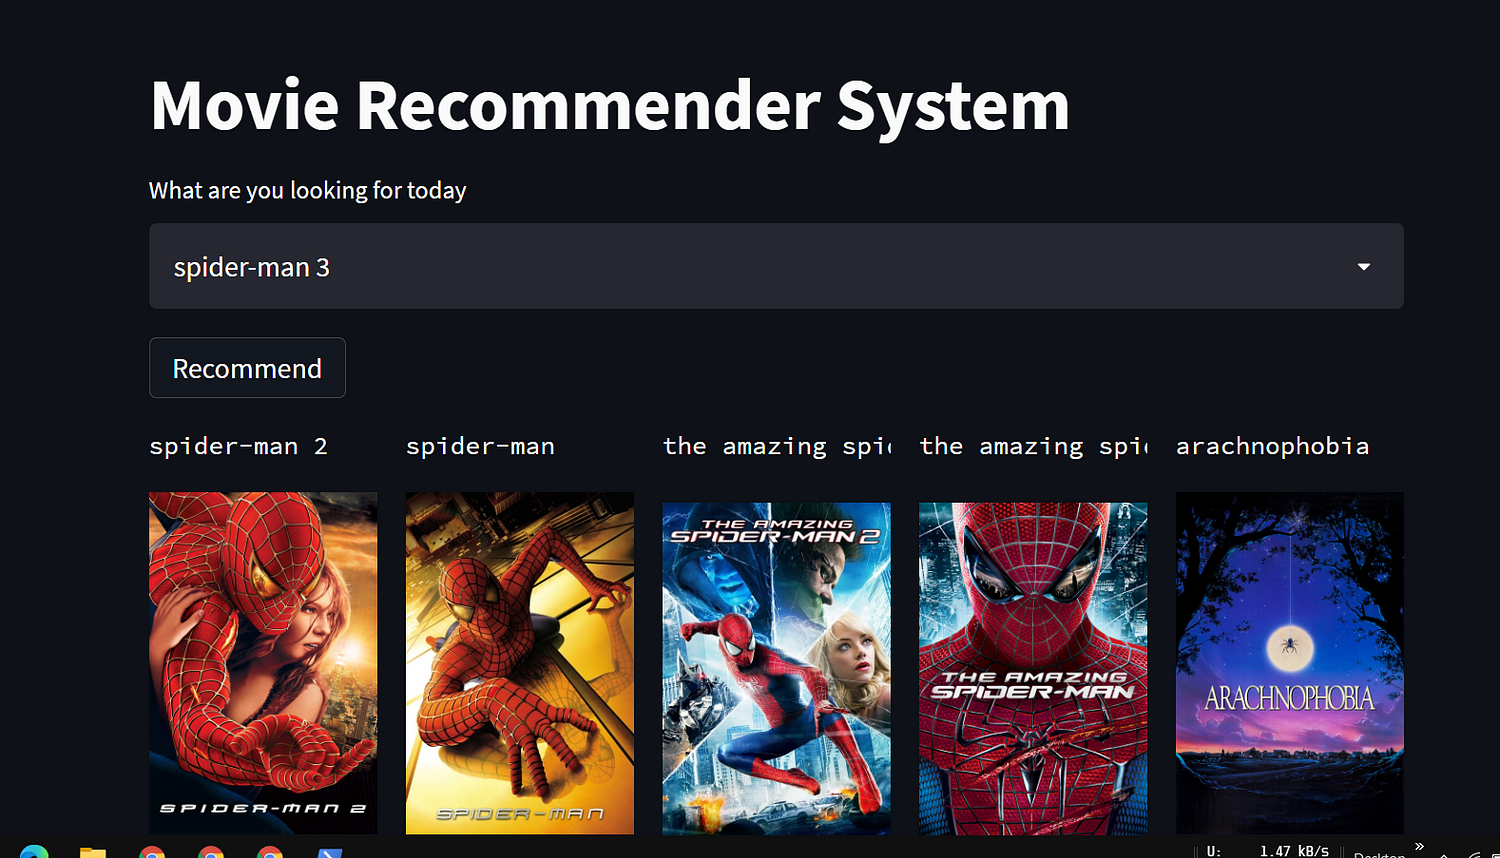

**OBJECTIVE:**
The primary objective is to implement a User-Based Recommender System using the Singular Value Decomposition (SVD) method. The system aims to predict user preferences for movies and recommend movies accordingly, enhancing user satisfaction and engagement with the platform.

**DATASET:**
The dataset used for this recommender system is a part of the 'MovieLens' dataset which includes two key datasets: 'ratings' and 'movies'.

*   The 'ratings' dataset contains user ratings for movies, where each record includes a user ID, movie ID, rating and timestamp. The project involves loading this dataset, finding the unique number of users and movies, creating a rating matrix, and using this data to train the recommender system.
*   The 'movies' dataset provides metadata for each movie, including the movie ID, title and genres. This dataset is used to identify movies and provide recommendations based on the predictions made by the SVD algorithm.



In [ ]:
conda install -c conda-forge scikit-surprise

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.2





Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\user\anaconda3

  added / updated specs:
    - scikit-surprise


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.7.22  |       h56e8100_0         146 KB  conda-forge
    certifi-2023.7.22          |     pyhd8ed1ab_0         150 KB  conda-forge
    openssl-1.1.1u             |       hcfcfb64_0         5.0 MB  conda-forge
    python_abi-3.10            |          2_cp310           4 KB  conda-forge
    scikit-surprise-1.1.3      |  py310h9b08ddd_1         859 KB  conda-forge
    ucrt-10.0.22621.0          |       h57928b3_0         1.2 MB  conda-forge
    vc14_runtime-14.36.32532   |      hfdfe4a8_17         723 KB  conda-forge
    vs2015_runtime-14.36.32532 |      h05e6639_17          17 KB  conda-forge
    ------------------------------------------------------------
       

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [ ]:
#Load the datasets
ratings_df = pd.read_csv("ratings.csv")
movies_df = pd.read_csv("movies.csv")

In [ ]:
#Check the head for ratings dataset
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [ ]:
#Check the shape of ratings
ratings_df.shape

(1048575, 4)

In [ ]:
#Check for null values for ratings
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
#Check the head for movies dataset
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#Check the shape of movies
movies_df.shape

(27278, 3)

In [ ]:
#Check for null values in movies
movies_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
#Find the unique number of users and movies in the 'ratings' dataset
num_users = ratings_df['userId'].unique()
num_movies = ratings_df['movieId'].unique()

In [ ]:
#Display the unique results
num_users

array([   1,    2,    3, ..., 7118, 7119, 7120], dtype=int64)

In [ ]:
num_movies

array([     2,     29,     32, ...,  32013, 102596,  65651], dtype=int64)

In [ ]:
#Create a rating matrix for the 'ratings' dataset and store it in 'Ratings'
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
Ratings = trainset.ur

In [ ]:
#Load the 'ratings' dataset as SVD's Dataset object and compute 3-fold cross-validation using the SVD object
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8448  0.8460  0.8437  0.8448  0.0010  
MAE (testset)     0.6474  0.6481  0.6462  0.6472  0.0008  
Fit time          12.69   13.11   13.12   12.97   0.20    
Test time         5.52    5.27    5.64    5.47    0.16    


{'test_rmse': array([0.84476569, 0.84600505, 0.84366932]),
 'test_mae': array([0.64736317, 0.64805583, 0.64615572]),
 'fit_time': (12.686559438705444, 13.10840106010437, 13.116995334625244),
 'test_time': (5.515215873718262, 5.265251874923706, 5.641194581985474)}

In [ ]:
#Find all the movies rated as 5 stars by user id '5' and store it in 'ratings_1' DataFrame
user_id = 5
ratings_1 = ratings_df[(ratings_df['userId'] == user_id) & (ratings_df['rating'] == 5)]

In [ ]:
#Create a shallow copy of the 'movies' dataset and store the result in 'user_5' DataFrame
user_5 = movies_df.copy()

In [ ]:
#Train a recommender system using the SVD object and predict the ratings for user id '5'
svd.fit(trainset)
user_5['Predicted_Rating'] = user_5['movieId'].apply(lambda x: svd.predict(user_id, x).est)

In [ ]:
#Print the top 10 movie recommendations for the user id '5'
top_10_recommendations = user_5.sort_values(by='Predicted_Rating', ascending=False).head(10).reset_index(drop=True)
print("Top 10 movie recommendations for user 5:\n")
print(top_10_recommendations[['movieId', 'title', 'Predicted_Rating']])

Top 10 movie recommendations for user 5:

   movieId                                              title  \
0      364                              Lion King, The (1994)   
1     6985  Passion of Joan of Arc, The (Passion de Jeanne...   
2     1198  Raiders of the Lost Ark (Indiana Jones and the...   
3      318                   Shawshank Redemption, The (1994)   
4      260          Star Wars: Episode IV - A New Hope (1977)   
5      527                            Schindler's List (1993)   
6     2028                         Saving Private Ryan (1998)   
7      356                                Forrest Gump (1994)   
8     2324         Life Is Beautiful (La Vita è bella) (1997)   
9   112552                                    Whiplash (2014)   

   Predicted_Rating  
0          5.000000  
1          5.000000  
2          5.000000  
3          5.000000  
4          4.992765  
5          4.990595  
6          4.983375  
7          4.966734  
8          4.966101  
9          4.957064  
